# **Book Genre Prediction**

In [7]:
#Importing libraries.

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt 
import seaborn as sns
import re
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [26]:
#Using the pandas framework a dataset is created using the "BooksDataSet.csv" file.

books=pd.read_csv('./coding/with_ques/AAA.csv')

#We only keep the 4 neccessary columns that we will be need. 
books=pd.DataFrame(books,columns=['problem_statement','title','tags','num_occur'])

In [27]:
books.head()

,problem_statement,title,tags,num_occur
0,Design a data structure that follows the const...,LRU Cache,Linked List,117
1,Given an array of integers nums and an integer...,Two Sum,Hash Table,117
2,Given an m x n 2D binary grid grid which repre...,Number of Islands,Array,103
3,Given an array of intervals where intervals[i]...,Merge Intervals,String,87
4,You are given an array of strings products and...,Search Suggestions System,Depth-First Search,68


In [28]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   problem_statement  10 non-null     object
 1   title              10 non-null     object
 2   tags               10 non-null     object
 3   num_occur          10 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 448.0+ bytes


In [29]:
books.shape

(10, 4)

In [30]:
#Grouping all the rows by genre.
books.groupby('tags').count()

,problem_statement,title,num_occur
tags,,,
Array,2,2,2
Backtracking,1,1,1
Breadth-First Search,1,1,1
Depth-First Search,1,1,1
Dynamic Programming,1,1,1
Hash Table,1,1,1
Linked List,1,1,1
String,2,2,2


In [17]:
books['problem_statement']


0    Design a data structure that follows the const...
1    Given an array of integers nums and an integer...
2    Given an m x n 2D binary grid grid which repre...
3    Given an array of intervals where intervals[i]...
4    You are given an array of strings products and...
5    You are given an array prices where prices[i] ...
6    Given an array of strings strs, group the anag...
7    Given an array of points where points[i] = [xi...
8    Given a string s, find the length of the longe...
9    You are given an array of k linked-lists lists...
Name: problem_statement, dtype: object

In [18]:
# function for text cleaning
 
def clean(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

books.loc[:,'problem_statement']=books.loc[:,'problem_statement'].apply(lambda x: clean(x))

In [19]:
#Displaying "summary" after text-cleaning.
books['problem_statement']


0    design a data structure that follows the const...
1    given an array of integers nums and an integer...
2    given an m x n d binary grid grid which repres...
3    given an array of intervals where intervals i ...
4    you are given an array of strings products and...
5    you are given an array prices where prices i i...
6    given an array of strings strs group the anagr...
7    given an array of points where points i xi yi ...
8    given a string s find the length of the longes...
9    you are given an array of k linked lists lists...
Name: problem_statement, dtype: object

Graph to visualize the words and frequency in problem_statement.




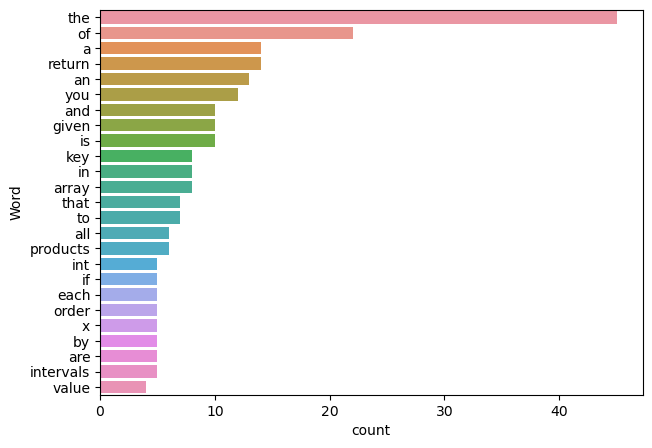

In [20]:
#Function to visualize the words and frequency in book's summary.

print("Graph to visualize the words and frequency in problem_statement.\n\n")

def freqwords(x, terms): 
  allwords = ' '.join([text for text in x]) 
  allwords = allwords.split() 
  fdist = nltk.FreqDist(allwords) 
  wordsdf = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  
  d = wordsdf.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(7,5)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 25 most frequent words 
freqwords(books['problem_statement'], 25)

In [21]:
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def removestopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

books['problem_statement'] = books['problem_statement'].apply(lambda x: removestopwords(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [22]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemma=WordNetLemmatizer()

def lematizing(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = lemma.lemmatize(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


books['problem_statement'] = books['problem_statement'].apply(lambda x: lematizing(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


books['problem_statement'] = books['problem_statement'].apply(lambda x: stemming(x))

In [24]:
books['problem_statement']


0    design data structur follow constraint least r...
1    given array integ num integ target return inde...
2    given x n binari grid grid repres map land wat...
3    given array interv interv starti endi merg ove...
4    given array string product string searchword d...
5    given array price price price given stock ith ...
6    given array string str group anagram togeth re...
7    given array point point xi yi repres point x p...
8    given string find length longest substr withou...
9    given array k link list list link list sort as...
Name: problem_statement, dtype: object

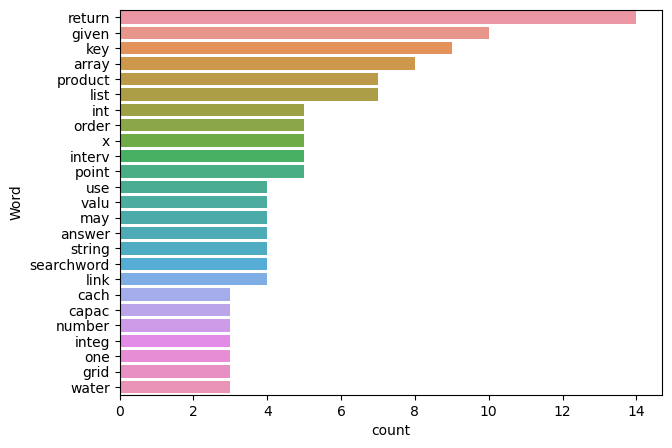

In [25]:
#Function to visualize the words and frequency in book's summary.

# print 25 most frequent words 
freqwords(books['problem_statement'], 25)

In [32]:
#Labeling each 'genre' with an unique number 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(books['tags'])

In [33]:
#perform inverse mapping on the unique numbers representing a genre.
le.inverse_transform([0,1,2,3,4,5])

array(['Array', 'Backtracking', 'Breadth-First Search',
       'Depth-First Search', 'Dynamic Programming', 'Hash Table'],
      dtype=object)

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(books['problem_statement'], y, test_size=0.2, random_state=557)


In [39]:
#Performing tf-idf 

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=50)
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain.values.astype('U'))
xtest_tfidf = tfidf_vectorizer.transform(xtest.values.astype('U'))

In [40]:
svc = SVC(kernel='rbf',gamma=1)
svc.fit(xtrain_tfidf,ytrain)
svpred=svc.predict(xtest_tfidf)

print("Support Vector Classifier\n")
print( 'Accuracy Score :',accuracy_score(ytest,svpred))
print ('Report : ')
print(classification_report(ytest,svpred))


Support Vector Classifier

Accuracy Score : 0.0
Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

In [41]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(xtrain_tfidf,ytrain)
rfpred=rf.predict(xtest_tfidf)

print("Random Forest Classifier\n")
print( 'Accuracy Score :',accuracy_score(ytest,rfpred))
print ('Report : ')
print(classification_report(ytest,rfpred))


Random Forest Classifier

Accuracy Score : 0.0
Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

In [22]:
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(xtrain_tfidf,ytrain)
dtpred=dt.predict(xtest_tfidf)

print("Decision Tree Classifier\n")
print( 'Accuracy Score :',accuracy_score(ytest,dtpred))
print ('Report : ')
print(classification_report(ytest,dtpred))


Decision Tree Classifier

Accuracy Score : 0.43
Report : 
              precision    recall  f1-score   support

           0       0.47      0.50      0.48       102
           1       0.41      0.51      0.45        89
           2       0.50      0.46      0.48       110
           3       0.48      0.40      0.43       100
           4       0.45      0.46      0.46        97
           5       0.27      0.25      0.26       102

    accuracy                           0.43       600
   macro avg       0.43      0.43      0.43       600
weighted avg       0.43      0.43      0.43       600



In [23]:
gvc = GradientBoostingClassifier()
gvc.fit(xtrain_tfidf,ytrain)
gvcpred=gvc.predict(xtest_tfidf)

print("Gradient Boosting Classifier\n")
print( 'Accuracy Score :',accuracy_score(ytest,gvcpred))
print ('Report : ')
print(classification_report(ytest,gvcpred))


Gradient Boosting Classifier

Accuracy Score : 0.6433333333333333
Report : 
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       102
           1       0.58      0.55      0.56        89
           2       0.72      0.70      0.71       110
           3       0.69      0.65      0.67       100
           4       0.72      0.69      0.71        97
           5       0.49      0.50      0.50       102

    accuracy                           0.64       600
   macro avg       0.64      0.64      0.64       600
weighted avg       0.64      0.64      0.64       600



In [24]:
lg = LGBMClassifier()
lg.fit(xtrain_tfidf,ytrain)
lgbpred=lg.predict(xtest_tfidf)

print("Naive Bayes Classifier\n")
print( 'Accuracy Score :',accuracy_score(ytest,lgbpred))
print ('Report : ')
print(classification_report(ytest,lgbpred))


Naive Bayes Classifier

Accuracy Score : 0.655
Report : 
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       102
           1       0.57      0.64      0.60        89
           2       0.74      0.71      0.73       110
           3       0.67      0.62      0.64       100
           4       0.76      0.69      0.72        97
           5       0.55      0.57      0.56       102

    accuracy                           0.66       600
   macro avg       0.66      0.65      0.65       600
weighted avg       0.66      0.66      0.66       600



* Among all models Support Vector Classifier model gives highest accuracy,so we make final prediction using this model.

## **Final Support Vector Regression model**

In [25]:
model = SVC(kernel='rbf',gamma=1)
model.fit(xtrain_tfidf,ytrain)
pred=model.predict(xtest_tfidf)

print(pred)
print('\nAccuracy Score :',accuracy_score(ytest,pred))
print ('Report : ')
conf_matrix = confusion_matrix(ytest, pred)
print(classification_report(ytest,pred))


[4 5 1 5 0 0 1 5 2 4 1 4 1 2 5 2 5 1 4 5 4 3 4 2 4 2 2 5 2 4 2 2 5 3 2 2 5
 3 0 4 4 4 5 3 2 5 2 2 0 4 4 5 0 2 5 3 1 2 4 1 2 4 1 2 0 0 1 1 4 0 4 5 3 0
 1 1 4 5 2 2 5 1 5 4 4 5 2 2 2 5 4 2 0 5 3 2 5 3 3 5 0 2 5 3 3 4 2 2 0 3 4
 5 3 1 1 4 1 5 4 4 4 5 0 0 0 4 3 1 3 2 2 5 1 2 2 1 0 1 4 3 1 1 3 3 0 2 2 3
 3 2 0 4 1 4 0 0 4 1 0 4 1 2 4 2 1 4 4 3 0 3 0 3 2 0 0 3 2 5 2 4 4 3 5 3 1
 5 5 3 0 3 5 5 0 4 3 1 2 3 1 0 0 4 2 0 2 4 3 1 2 5 3 3 5 2 1 1 1 0 1 3 1 0
 0 2 4 0 1 5 5 5 5 2 3 2 1 5 4 4 3 5 3 2 0 5 5 3 1 0 4 3 0 0 2 5 0 0 5 4 5
 3 0 0 1 3 2 2 1 3 1 0 5 2 5 1 4 1 5 1 3 1 5 3 4 3 4 1 1 1 1 0 0 3 2 2 4 4
 0 5 1 2 2 1 3 3 4 3 1 5 0 1 3 3 0 2 0 5 2 2 0 5 0 2 3 4 1 3 0 5 1 2 3 3 3
 0 5 1 2 2 2 5 2 1 3 0 1 0 1 4 3 0 0 4 3 5 4 0 4 2 0 3 3 3 1 2 5 0 2 5 4 2
 5 0 3 0 5 5 5 5 5 0 2 2 2 4 1 5 3 0 5 1 4 0 1 5 4 2 1 2 5 4 5 5 3 3 5 3 1
 0 3 0 4 0 2 1 5 5 1 1 4 2 3 0 4 4 2 2 5 5 3 3 4 5 5 2 5 5 2 5 5 4 4 1 2 4
 4 5 1 2 1 4 0 1 5 1 4 2 3 5 1 3 2 1 3 0 4 0 0 4 4 2 3 0 2 1 2 4 5 0 1 3 4
 5 3 0 0 1 1 5 5 0 0 3 0 

In [26]:
k = xtest.sample(1).index[0]
k

1576

## Testing our Model by comparing Actual genre with Predicted genre

In [27]:
def process(q):
    q = clean(q)
    q = removestopwords(q)
    q = lematizing(q)
    q = stemming(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = model.predict(q_vec)
    return le.inverse_transform(q_pred)[0]

for i in range(50):
  k = xtest.sample(1).index[0]
  
  print("\nBook: ", books['book_name'][k] )
  print("\nPredicted genre: ", process(xtest[k]))
  print("\nActual genre: ",books['genre'][k], "\n")
  print("-------------------------------")



Book:  Marazan

Predicted genre:  Historical novel

Actual genre:  Thriller 

-------------------------------

Book:  Johnny Gone Down

Predicted genre:  Thriller

Actual genre:  Thriller 

-------------------------------

Book:  Thirteenth City

Predicted genre:  Science Fiction

Actual genre:  Science Fiction 

-------------------------------

Book:  The Husband

Predicted genre:  Fantasy

Actual genre:  Thriller 

-------------------------------

Book:  Candle

Predicted genre:  Science Fiction

Actual genre:  Science Fiction 

-------------------------------

Book:  Blind Lake

Predicted genre:  Science Fiction

Actual genre:  Science Fiction 

-------------------------------

Book:  Echo Park

Predicted genre:  Crime Fiction

Actual genre:  Crime Fiction 

-------------------------------

Book:  Sons of Destiny

Predicted genre:  Horror

Actual genre:  Horror 

-------------------------------

Book:  Quarantine

Predicted genre:  Horror

Actual genre:  Historical novel 

--------